# Problem 1

### Getting familiar with loading, visualizing and operating on multivariate data

A Hess diagram is a 2D plot coded by a third quantity.

Here's an example from the [astroML documentation](https://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html) showing the temperature and surface gravity (how strongly the star would pull on you if you could stand on it's surface, including the effect of rotation), color coded on the left by density, and on the right by metallicity (measured here as the ratio of iron to hydrogen) with density contours.


<img src="https://www.astroml.org/_images/plot_SDSS_SSPP_1.png">

From http://das.sdss.org/va/stripe_82_variability/SDSS_82_public/, download eight HLC\*fits.gz files (and recall how you can use `astropy.io.fits` to load these)

The HLC files are each different bands on the sky.

For each HLC file, separate stars and galaxies by using the `MEAN_OBJECT_TYPE` column and making a cut with value > 5 to find stars.

For each HLC file, and separately for stars and galaxies make a 3-panel plot.

In the left plot show `r` vs `g-i` color coded by density (recall we did this with `seaborn`'s `jointplot`, but you can use whatever).

Estimate a bivariate distribution for `density(r, g-i)` this sample (recall we did with `seaborn`'s `jointplot` use `kde`, but you can use whatever).

In the middle and right panel, again plot `r` vs `g-i`, but now color-coded by proper motion in RA, and Dec. Overlay the density contors.

Comment on the structure in stars vs galaxies, and the evolution with position on the sky in each HLC.


In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
filename = ['data/HLC.RA_00_to_01.fits', 'data/HLC.RA_01_to_02.fits', 'data/HLC.RA_02_to_03.fits', 'data/HLC.RA_03_to_04.fits','data/HLC.RA_20_to_21.fits','data/HLC.RA_21_to_22.fits','data/HLC.RA_22_to_23.fits','data/HLC.RA_23_to_24.fits']

/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were n

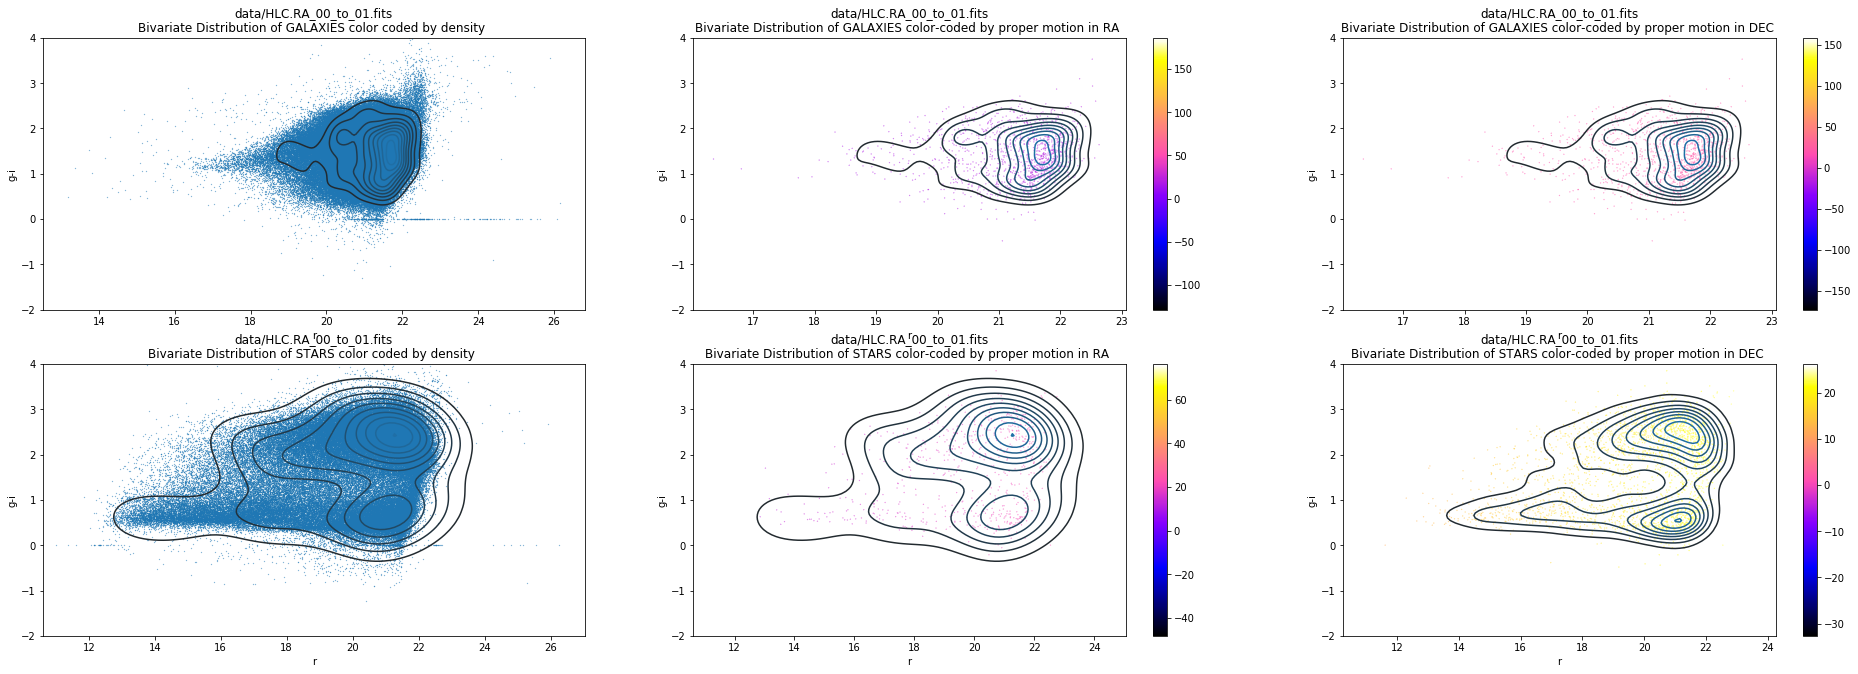

/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were n

Here I tried a forloop so it could make graphs for all the files. It is making the graphs but not displaying 
 The graphs are only being displayed for the first file.


/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


In [19]:
#again plot r vs g-i, but now color-coded by proper motion in RA, and Dec. Overlay the density contors.
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (33,11))

def make_graphs(filename):
    hdulist = fits.open(filename)
    data = hdulist[1].data
    #seperating stars and galaxies
    gal = data[data['MEAN_OBJECT_TYPE'] < 5]
    stars = data[data['MEAN_OBJECT_TYPE'] > 5]
    #removing vertical chunk
    gal = gal[gal['MEAN_PSFMAG'][:,2] > 10]
    stars = stars[stars['MEAN_PSFMAG'][:,2] > 10]
    #adjust gal/stars for g - i
    gal = gal[np.abs(gal['MEAN_PSFMAG'][:,1] - gal['MEAN_PSFMAG'][:,3]) < 10]
    stars = stars[np.abs(stars['MEAN_PSFMAG'][:,1] - stars['MEAN_PSFMAG'][:,3]) < 10]

    r_gal = gal["MEAN_PSFMAG"][:,2]
    r_stars = stars["MEAN_PSFMAG"][:,2]
    g_i_gal = gal["MEAN_PSFMAG"][:,1] - gal["MEAN_PSFMAG"][:,3]
    g_i_stars = stars["MEAN_PSFMAG"][:,1] - stars["MEAN_PSFMAG"][:,3]
    

    ax1.scatter(r_gal,g_i_gal, s = 0.05)
    sns.kdeplot(r_gal[::2000],g_i_gal[::2000],kind ='hex',ax = ax1)
    ax1.set_ylim(-2,4)
    ax1.set_xlabel("r")
    ax1.set_ylabel("g-i")
    ax1.set_title(filename +"\n"+'Bivariate Distribution of GALAXIES color coded by density ')

    ax4.scatter(r_stars,g_i_stars, s = 0.05)
    sns.kdeplot(r_stars[::2000],g_i_stars[::2000],kind ='hex',ax = ax4)
    ax4.set_ylim(-2,4)
    ax4.set_xlabel("r")
    ax4.set_ylabel("g-i")
    ax4.set_title(filename +"\n"+'Bivariate Distribution of STARS color coded by density ')


    ra_gal = gal['RA_PM']
    dec_gal = gal['DEC_PM']
    ra_stars = stars['RA_PM']
    dec_stars = stars['DEC_PM']



    ax2.set_ylim(-2,4)
    ra_norm = plt.Normalize(vmin = np.min(ra_gal),vmax = np.max(ra_gal)) 
    smap = plt.cm.ScalarMappable(cmap = plt.cm.gnuplot2, norm = ra_norm)
    smap.set_array([])
    colorbar = fig.colorbar(smap, ax=ax2)
    ax2.scatter(r_gal[::200],g_i_gal[::200], s = 0.05, color = plt.cm.gnuplot2(ra_norm(r_gal[::200])))
    sns.kdeplot(r_gal[::2000],g_i_gal[::2000],kind ='hex',ax = ax2)
    ax2.set_xlabel("r")
    ax2.set_ylabel("g-i")
    ax2.set_title(filename +"\n"+'Bivariate Distribution of GALAXIES color-coded by proper motion in RA ')

    ax5.set_ylim(-2,4)
    ra_norm = plt.Normalize(vmin = np.min(ra_stars),vmax = np.max(ra_stars)) 
    smap = plt.cm.ScalarMappable(cmap = plt.cm.gnuplot2, norm = ra_norm)
    smap.set_array([])
    colorbar = fig.colorbar(smap, ax=ax5)
    ax5.scatter(r_stars[::200],g_i_stars[::200], s = 0.05, color = plt.cm.gnuplot2(ra_norm(r_stars[::200])))
    sns.kdeplot(r_stars[::2000],g_i_stars[::2000],kind ='hex',ax = ax5)
    ax5.set_xlabel("r")
    ax5.set_ylabel("g-i")
    ax5.set_title(filename +"\n"+'Bivariate Distribution of STARS color-coded by proper motion in RA ')

    ax3.set_ylim(-2,4)
    dec_norm = plt.Normalize(vmin = np.min(dec_gal),vmax = np.max(dec_gal)) 
    smap = plt.cm.ScalarMappable(cmap = plt.cm.gnuplot2, norm = dec_norm)
    smap.set_array([])
    colorbar = fig.colorbar(smap, ax=ax3)
    ax3.scatter(r_gal[::200],g_i_gal[::200], s = 0.05, color = plt.cm.gnuplot2(dec_norm(r_gal[::200])))
    sns.kdeplot(r_gal[::2000],g_i_gal[::2000],kind ='hex',ax = ax3)
    ax3.set_xlabel("r")
    ax3.set_ylabel("g-i")
    ax3.set_title(filename +"\n"+'Bivariate Distribution of GALAXIES color-coded by proper motion in DEC ')
    
    ax6.set_ylim(-2,4)
    dec_norm = plt.Normalize(vmin = np.min(dec_stars),vmax = np.max(dec_stars)) 
    smap = plt.cm.ScalarMappable(cmap = plt.cm.gnuplot2, norm = dec_norm)
    smap.set_array([])
    colorbar = fig.colorbar(smap, ax=ax6)
    ax6.scatter(r_stars[::50],g_i_stars[::50], s = 0.05, color = plt.cm.gnuplot2(dec_norm(r_stars[::50])))
    sns.kdeplot(r_stars[::50],g_i_stars[::50],kind ='hex',ax = ax6)
    ax6.set_xlabel("r")
    ax6.set_ylabel("g-i")
    ax6.set_title(filename +"\n"+'Bivariate Distribution of STARS color-coded by proper motion in DEC ')
    
    plt.show()
    return True

make_graphs(filename[0])
make_graphs(filename[1])
print('Here I tried a forloop so it could make graphs for all the files. It is making the graphs but not displaying \n The graphs are only being displayed for the first file.')

# Problem 2

### Comparing distributions to a standard normal distribution

Load the `IntroStat_demo.csv` file in the data directory (use `pandas` or `astropy` or whatever you like).

Estimate the sample mean and variance of the suspiciously named `mag.outlier` column.

Make a Q-Q plot of the `mag.outlier` column and over plot a line with `Y = Mean + Sigma*X` on it. 

Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)

Overplot that line passing through the data.

Now try the same thing with `mag.het`. Describe what you found?

What happens if you rescale the data? Subtract of the sample mean of `mag.het` and divide by `mag.het.error`. Now repeat the Q-Q plot with this quantity. 

Describe what's going on.

In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import pylab
import matplotlib.pyplot as plt


data = pd.read_csv("IntroStat_demo.csv") 


def making_QQplot(values, variable):
    mag_out = values

    mean = mag_out.mean()
    sigma = mag_out.var()

    print("Mean of given column :",mean)
    print("Variance of given column :",sigma)

    plt.style.use('ggplot')
    x = np.linspace(-2,2,1000)
    y = [mean + sigma*i for i in x ]

    sm.qqplot(mag_out,line ='q',label ="Data")
    pylab.plot(x,y, color = "green", label = "Mean + Sigma*X")
    title = "Q-Q plot of the " +str(variable)
    pylab.title(title)
    pylab.legend(loc='best')
    pylab.show()
    first_qy, third_qy = np.percentile(mag_out, [25,75])

    print("first quartile value: ",first_qy)
    print("Third quartile value: ",third_qy)
    
    return True


Mean of given column : 18.561082466856572
Variance of given column : 0.005150698425781881


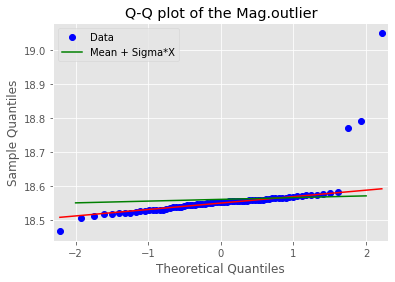

first quartile value:  18.5373952724961
Third quartile value:  18.56298225840465
Mean of given column : 18.548341155926813
Variance of given column : 0.0020798782042571124


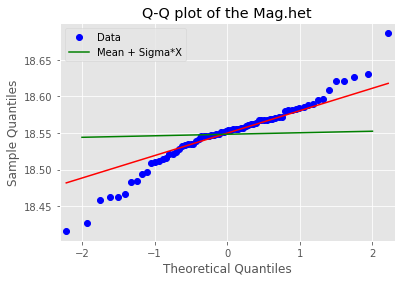

first quartile value:  18.5292093668539
Third quartile value:  18.570569962457924


True

In [3]:
mag_out = data['mag.outlier']
making_QQplot(mag_out, 'Mag.outlier')

mag_het = data['mag.het']
making_QQplot(mag_het, 'Mag.het')

Mean of given column : 0.1147979894887847
Variance of given column : 0.8235457747484791


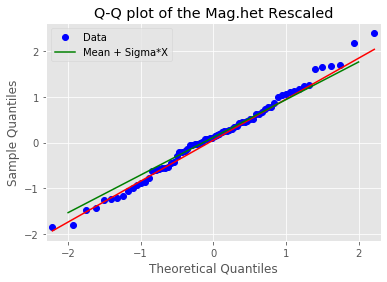

first quartile value:  -0.5510125887859657
Third quartile value:  0.6573012075923795


True

In [11]:
#Subtract of the sample mean of mag.het and divide by mag.het.error
mag_het_error = data['mag.het.error']
mean_old = mag_het.mean()

mag_het_rescaled = []
for i in range(len(mag_het)):
    mag_het_rescaled.append((mag_het[i]-mean_old)/mag_het_error[i])
    
making_QQplot(np.asarray(mag_het_rescaled), 'Mag.het Rescaled')


# Problem 3

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.


Split the data into LMC and SMC, and then again by mode F and 1, and plot the `W` on the y-axis vs `log(P1)` on x.
Fit or estimate straight lines to each of the four samples (you can use `statsmodels` `astropy` `scipy` `numpy`....)
(Yes, we've not covered fitting straight lines. That's OK.)

Compute the residuals of each sample to it's respective line. Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

Plot the residuals color coded by if they are positive or negative vs RA and Dec (just like a Hess diagram in Problem 1).

Finally, plot the residuals against the fitted `W` values, and just to anticipate the next homework assignment, also plot `log(P1) vs V-I`. Comment on what you are seeing.

/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/charmipatel/anaconda3/envs/fds/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

Text(0.5, 1.0, 'Log(P1) vs. V-I for SMC 1-mode')

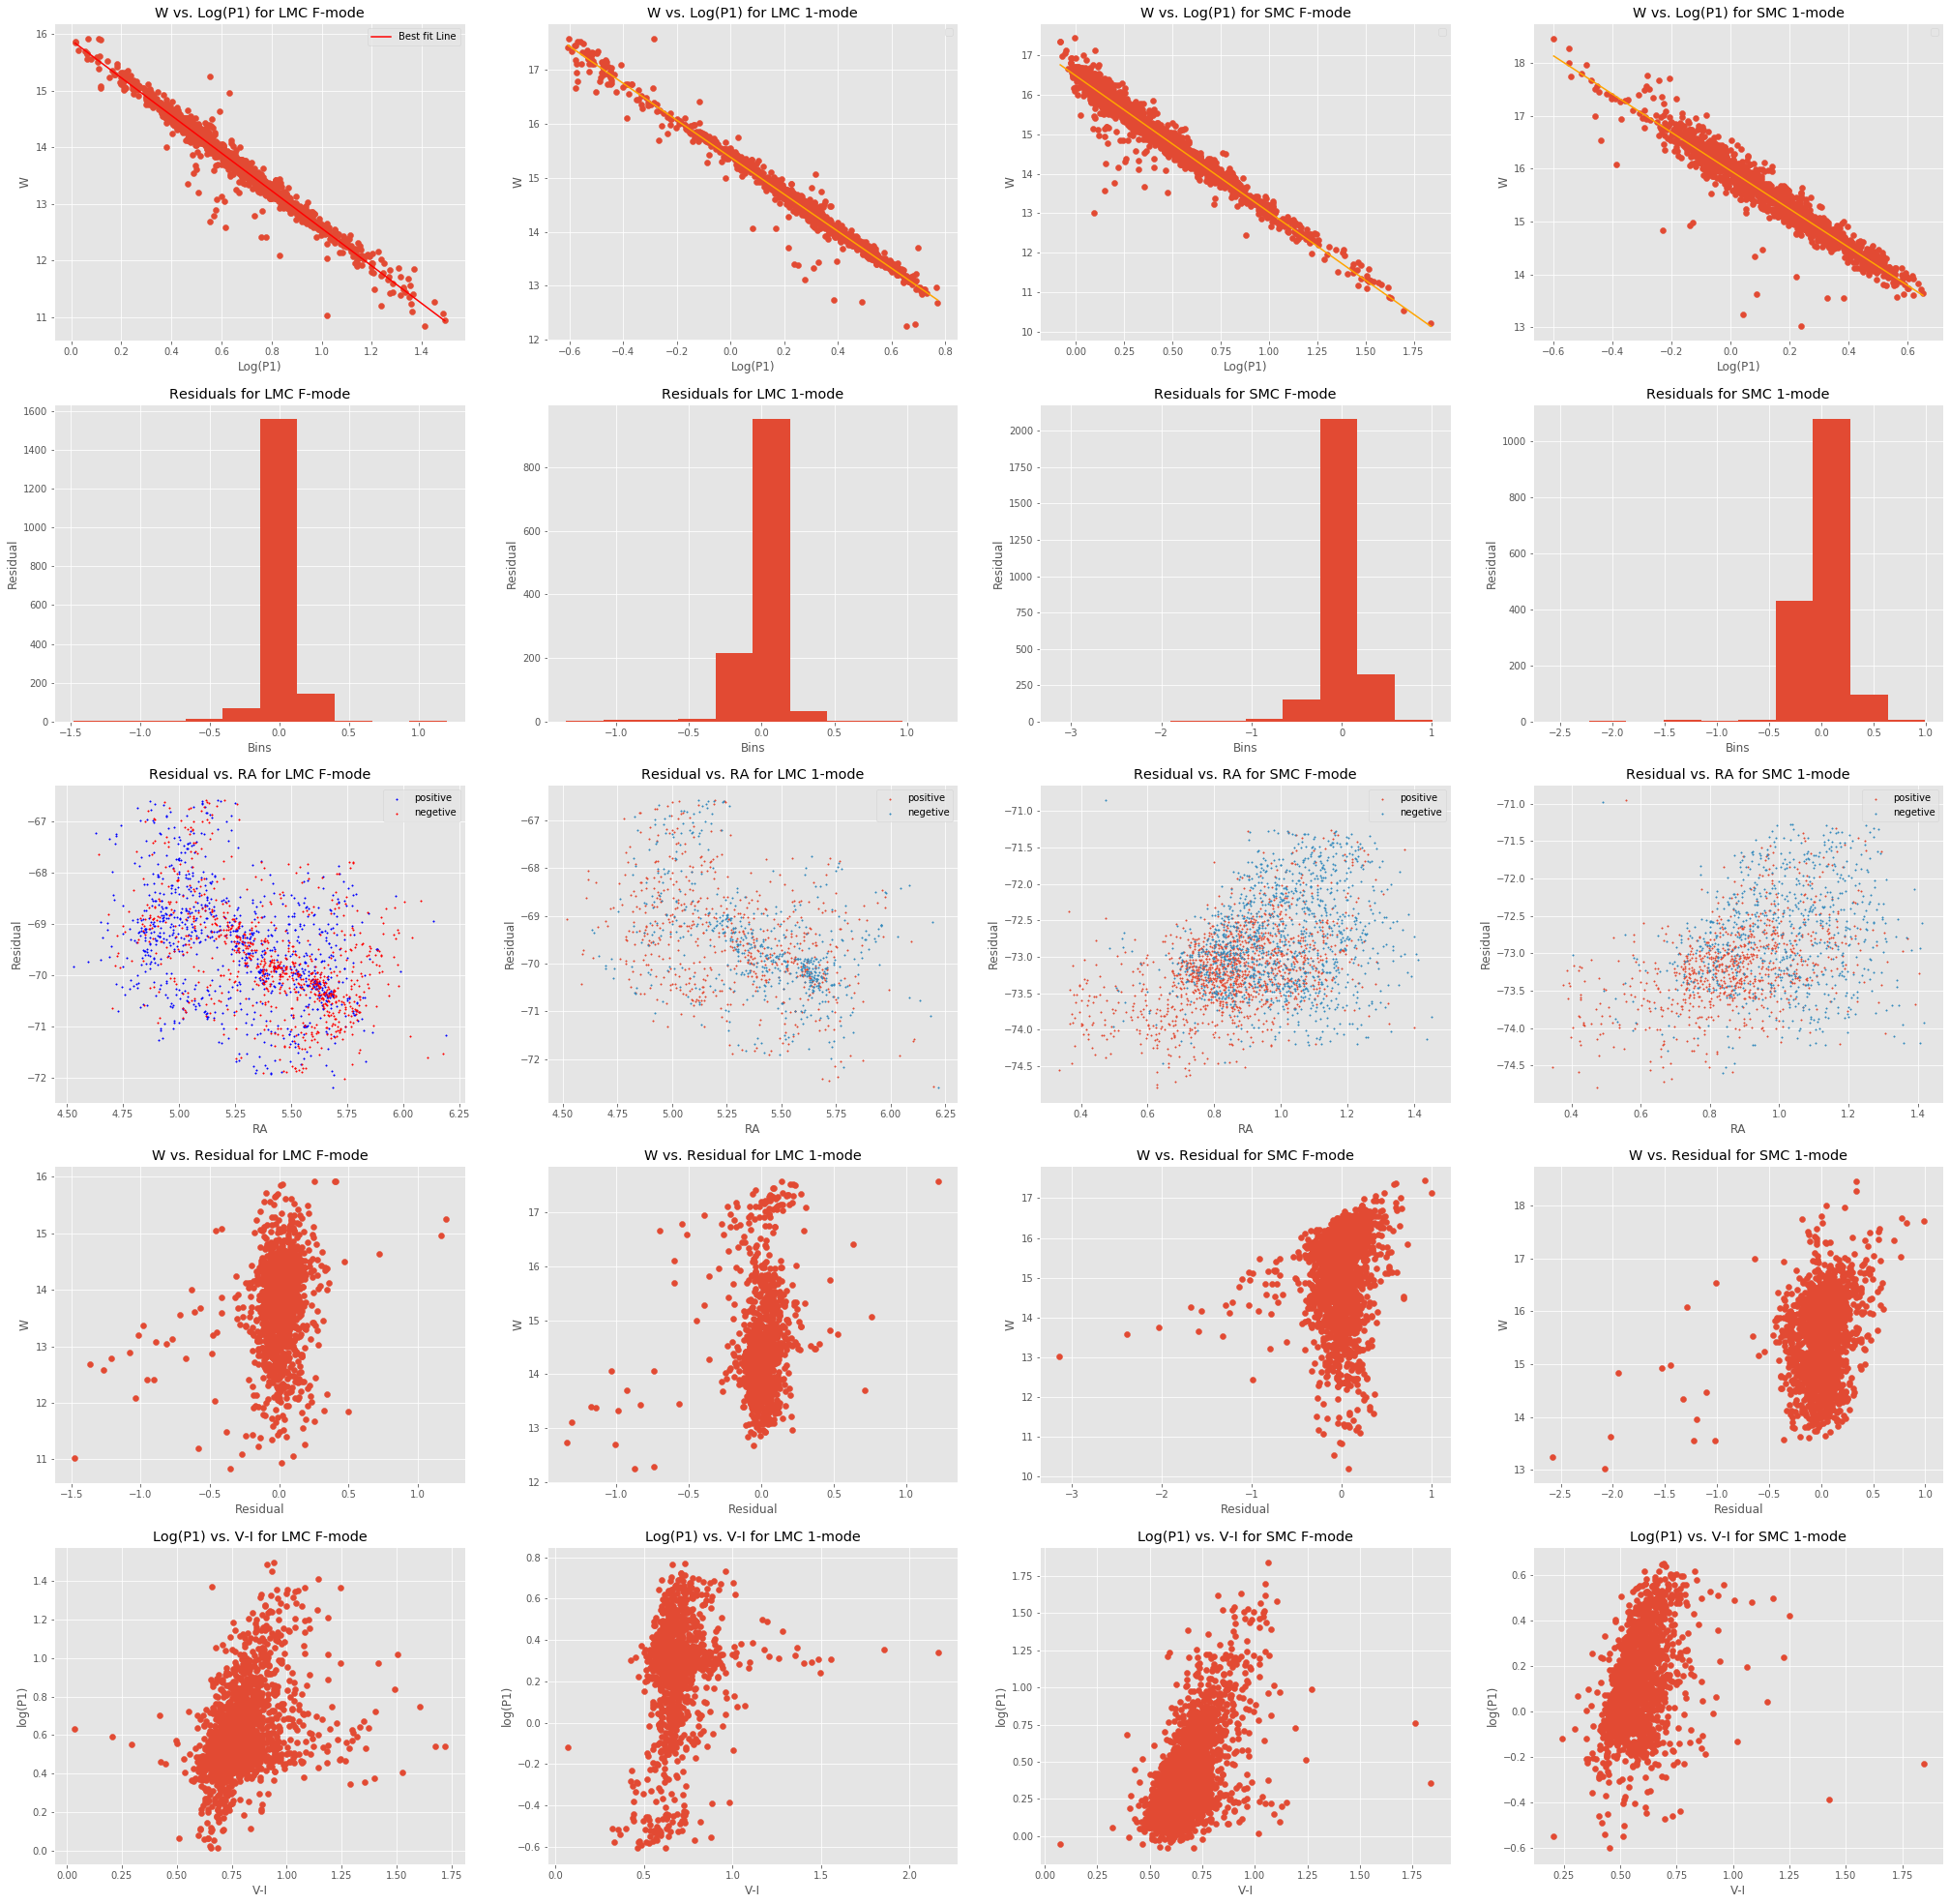

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv("/Users/charmipatel/Desktop/ast596_2020_Spring/data/01/Cepheids.csv") 

LMC_data = data[data['Cloud'] == "LMC"]
SMC_data = data[data['Cloud'] == "SMC"]

LMC_F_data = LMC_data[data['Mode'] == "F"]
LMC_1_data = LMC_data[data['Mode'] == "1"]
SMC_F_data = SMC_data[data['Mode'] == "F"]
SMC_1_data = SMC_data[data['Mode'] == "1"]

plt.style.use('ggplot')
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20)) = plt.subplots(5,4, figsize =(35,35))


ax1.scatter(LMC_F_data["logP1"], LMC_F_data["W"])
m,b = np.polyfit(LMC_F_data["logP1"], LMC_F_data["W"],1)
x = np.linspace(np.min(LMC_F_data["logP1"]),np.max(LMC_F_data["logP1"]))
ax1.plot(x, (m*x +b), color ='red', label = 'Best fit Line')
ax1.set_xlabel("Log(P1)")
ax1.set_ylabel("W")
ax1.set_title("W vs. Log(P1) for LMC F-mode")
ax1.legend()
res = LMC_F_data["W"] - (m*(LMC_F_data["logP1"]) +b)
LMC_F_data['res'] = res
ax5.hist(res,bins = 10)[2]
ax5.set_xlabel("Bins")
ax5.set_ylabel("Residual")
ax5.set_title("Residuals for LMC F-mode")
ax9.scatter((LMC_F_data["RA0"][LMC_F_data["res"] > 0]),(LMC_F_data["Decl0"][LMC_F_data["res"] > 0]), label= 'positive', s = 2, color = 'blue')
ax9.scatter(LMC_F_data["RA0"][LMC_F_data["res"] < 0],LMC_F_data["Decl0"][LMC_F_data["res"] < 0], label= 'negetive', s = 2, color = "red")
ax9.set_xlabel("RA")
ax9.set_ylabel("Residual")
ax9.set_title("Residual vs. RA for LMC F-mode")
ax9.legend()
ax13.scatter(LMC_F_data["res"],LMC_F_data["W"])
ax13.set_xlabel("Residual")
ax13.set_ylabel("W")
ax13.set_title("W vs. Residual for LMC F-mode")
ax17.scatter(LMC_F_data["VI"],LMC_F_data["logP1"])
ax17.set_xlabel("V-I")
ax17.set_ylabel("log(P1)")
ax17.set_title("Log(P1) vs. V-I for LMC F-mode")

################################################################################################################

ax2.scatter(LMC_1_data["logP1"], LMC_1_data["W"])
m,b = np.polyfit(LMC_1_data["logP1"], LMC_1_data["W"],1)
x = np.linspace(np.min(LMC_1_data["logP1"]),np.max(LMC_1_data["logP1"]))
ax2.plot(x, (m*x +b), color ='orange')
ax2.set_xlabel("Log(P1)")
ax2.set_ylabel("W")
ax2.set_title("W vs. Log(P1) for LMC 1-mode")
ax2.legend()
res = LMC_1_data["W"] - (m*(LMC_1_data["logP1"]) +b)
LMC_1_data['res'] = res
ax6.hist(res,bins = 10)
ax6.set_xlabel("Bins")
ax6.set_ylabel("Residual")
ax6.set_title("Residuals for LMC 1-mode")
ax10.scatter((LMC_1_data["RA0"][LMC_1_data["res"] > 0]),(LMC_1_data["Decl0"][LMC_1_data["res"] > 0]), label= 'positive', s = 2)
ax10.scatter(LMC_1_data["RA0"][LMC_1_data["res"] < 0],LMC_1_data["Decl0"][LMC_1_data["res"] < 0], label= 'negetive', s = 2)
ax10.set_xlabel("RA")
ax10.set_ylabel("Residual")
ax10.set_title("Residual vs. RA for LMC 1-mode")
ax10.legend()
ax14.scatter(LMC_1_data["res"],LMC_1_data["W"])
ax14.set_xlabel("Residual")
ax14.set_ylabel("W")
ax14.set_title("W vs. Residual for LMC 1-mode")
ax18.scatter(LMC_1_data["VI"],LMC_1_data["logP1"])
ax18.set_xlabel("V-I")
ax18.set_ylabel("log(P1)")
ax18.set_title("Log(P1) vs. V-I for LMC 1-mode")

################################################################################################################


ax3.scatter(SMC_F_data["logP1"], SMC_F_data["W"])
m,b = np.polyfit(SMC_F_data["logP1"], SMC_F_data["W"],1)
x = np.linspace(np.min(SMC_F_data["logP1"]),np.max(SMC_F_data["logP1"]))
ax3.plot(x, (m*x +b), color ='orange')
ax3.set_xlabel("Log(P1)")
ax3.set_ylabel("W")
ax3.set_title("W vs. Log(P1) for SMC F-mode")
ax3.legend()
res = SMC_F_data["W"] - (m*(SMC_F_data["logP1"]) +b)
SMC_F_data['res'] = res
ax7.hist(res,bins = 10)
ax7.set_xlabel("Bins")
ax7.set_ylabel("Residual")
ax7.set_title("Residuals for SMC F-mode")
ax11.scatter((SMC_F_data["RA0"][SMC_F_data["res"] > 0]),(SMC_F_data["Decl0"][SMC_F_data["res"] > 0]), label= 'positive', s = 2)
ax11.scatter(SMC_F_data["RA0"][SMC_F_data["res"] < 0],SMC_F_data["Decl0"][SMC_F_data["res"] < 0], label= 'negetive', s = 2)
ax11.set_xlabel("RA")
ax11.set_ylabel("Residual")
ax11.set_title("Residual vs. RA for SMC F-mode")
ax11.legend()
ax15.scatter(SMC_F_data["res"],SMC_F_data["W"])
ax15.set_xlabel("Residual")
ax15.set_ylabel("W")
ax15.set_title("W vs. Residual for SMC F-mode")
ax19.scatter(SMC_F_data["VI"],SMC_F_data["logP1"])
ax19.set_xlabel("V-I")
ax19.set_ylabel("log(P1)")
ax19.set_title("Log(P1) vs. V-I for SMC F-mode")

################################################################################################################

ax4.scatter(SMC_1_data["logP1"], SMC_1_data["W"])
m,b = np.polyfit(SMC_1_data["logP1"], SMC_1_data["W"],1)
x = np.linspace(np.min(SMC_1_data["logP1"]),np.max(SMC_1_data["logP1"]))
ax4.plot(x, (m*x +b), color ='orange')
ax4.set_xlabel("Log(P1)")
ax4.set_ylabel("W")
ax4.set_title("W vs. Log(P1) for SMC 1-mode")
ax4.legend()
res = SMC_1_data["W"] - (m*(SMC_1_data["logP1"]) +b)
SMC_1_data['res'] = res
ax8.hist(res,bins = 10)
ax8.set_xlabel("Bins")
ax8.set_ylabel("Residual")
ax8.set_title("Residuals for SMC 1-mode")
ax12.scatter((SMC_1_data["RA0"][SMC_1_data["res"] > 0]),(SMC_1_data["Decl0"][SMC_1_data["res"] > 0]), label= 'positive', s = 2)
ax12.scatter(SMC_1_data["RA0"][SMC_1_data["res"] < 0],SMC_1_data["Decl0"][SMC_1_data["res"] < 0], label= 'negetive', s = 2)
ax12.set_xlabel("RA")
ax12.set_ylabel("Residual")
ax12.set_title("Residual vs. RA for SMC 1-mode")
ax12.legend()
ax16.scatter(SMC_1_data["res"],SMC_1_data["W"])
ax16.set_xlabel("Residual")
ax16.set_ylabel("W")
ax16.set_title("W vs. Residual for SMC 1-mode")
ax20.scatter(SMC_1_data["VI"],SMC_1_data["logP1"])
ax20.set_xlabel("V-I")
ax20.set_ylabel("log(P1)")
ax20.set_title("Log(P1) vs. V-I for SMC 1-mode")


